<a href="https://colab.research.google.com/github/nachovazquez98/multiple-regression-with-continuous-variables/blob/main/test_datascience1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
https://machinelearningmastery.com/feature-selection-for-regression-data/
https://towardsdatascience.com/multiple-linear-regression-model-using-python-machine-learning-d00c78f1172a
https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
https://www.kaggle.com/mnoori/feature-selection-for-mlr-with-python
'''


'\nhttps://machinelearningmastery.com/feature-selection-for-regression-data/\nhttps://towardsdatascience.com/multiple-linear-regression-model-using-python-machine-learning-d00c78f1172a\nhttps://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b\nhttps://www.kaggle.com/mnoori/feature-selection-for-mlr-with-python\n'

In [ ]:
'''
MAE (Mean absolute error) represents 
the difference between the original 
and predicted values extracted by 
averaged the absolute difference over 
the data set.
MAE = 1/n(sum(abs(y_test-y_pred)))
'''

'\nMAE (Mean absolute error) represents \nthe difference between the original \nand predicted values extracted by \naveraged the absolute difference over \nthe data set.\nMAE = 1/n(sum(abs(y_test-y_pred)))\n'

Importamos las librerias necesarias.
Necesitaremos sklearn que es una librería de machine learning que cuenta con algoritmos como regresión, clasificación, maquinas de soporte vectorial, entre otras.

In [3]:
import pandas as pd
import numpy as np
import os
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

Importamos el dataset y con la ayuda de os.chdir 
especificamos nuetro directorio de trabajo

In [5]:
#os.chdir("/home/nacho/Documents/ares_materials")
df1 = pd.read_csv('https://raw.githubusercontent.com/nachovazquez98/multiple-regression-with-continuous-variables/main/dataset1.csv', index_col=0)
print(df1.shape)
df1.head(5)

(48, 59)


,BCUTi-1h,Xp-2d,MATS8dv,VE1_D,AXp-2d,ATSC3m,AATSC1s,MATS2i,SdCH2,SsOH,ATS2pe,ETA_eta_RL,MATS2m,VSA_EState7,VR3_DzZ,GATS1se,VR2_Dzare,ATSC0v,SMR_VSA1,MATS3i,AATS1pe,VSA_EState1,nBondsM,VE1_Dzp,SRW09,EState_VSA2,Mp,bpol,nFAHRing,C1SP3,AETA_beta,SlogP_VSA1,LogEE_Dzm,MATS1dv,GATS6i,SpAD_Dzp,MATS1d,BCUTs-1l,MATS1s,ATSC1s,BalabanJ,AATS5p,GATS3Z,IC4,AATS0m,TMPC10,Xch-6d,AATSC3dv,BCUTd-1l,AATSC5s,MATS7c,MATS1dv.1,Vinyl,ATSC2Z,AMID_C,MATS1s.1,AATSC0p,BIC2,out
0,13.895849,8.628555,0.044544,4.564680,0.301843,-256.139555,-0.047696,0.041813,4.854322,0.0,506.438430,10.419959,-0.022304,3.739027,5.495943,0.708443,5.238226,2272.518275,18.033409,-0.274388,6.472034,10.676250,5.734,4.570675,2.366077,25.804847,0.655535,32.726532,0.0,4.441,0.894256,4.625761,89.157917,0.323880,0.872395,283.765048,0.362875,1.212832,-0.014712,-1.287017,3.267507,1.207208,0.868120,3.868637,107.965385,465.647,0.188659,-0.045936,0.965591,-0.062835,-0.039117,0.323880,0.0,-58.195687,1.382489,-0.014712,0.299177,0.648014,1.544
1,13.648456,12.573157,0.112254,5.263012,0.338144,-2045.543729,-0.090539,0.079945,4.767247,0.0,663.264328,13.339168,0.113056,0.302839,6.141136,0.742280,5.743652,3131.459122,33.807876,-0.495762,6.442005,18.748077,4.906,5.278183,0.000000,56.544082,0.649191,46.189792,0.0,7.547,0.815488,0.000000,146.864357,0.369861,1.010928,491.605118,0.252090,1.138600,-0.040447,-4.359277,5.236895,1.280034,1.214242,3.639999,110.813808,416.511,0.000000,-0.230129,0.974518,-0.381381,-0.129256,0.369861,0.0,91.515649,1.331832,-0.040447,0.316465,0.607980,1.514
2,13.646090,8.080736,-0.011131,4.492360,0.321045,-215.077577,-0.092209,-0.055423,3.314185,0.0,444.735096,10.106669,-0.057517,1.961540,5.371870,0.738379,4.962561,2153.527014,24.009597,-0.204101,6.494453,12.814696,6.367,4.487855,0.000000,26.639955,0.670777,30.682567,0.0,4.595,0.969184,0.000000,86.298689,0.307180,0.961316,284.844531,0.305887,1.299427,-0.041022,-2.587579,3.577158,1.315603,0.840928,3.965350,116.647351,279.456,0.040083,-0.003057,0.967335,-0.186314,-0.107089,0.307180,0.0,-80.361692,1.382212,-0.041022,0.320449,0.688827,1.542
3,13.640822,6.345515,-0.038704,4.004890,0.337185,-13.175728,-0.110932,-0.062564,3.720706,0.0,351.860168,8.213410,-0.087141,1.793887,4.723932,0.787637,4.357159,1732.525797,18.361198,-0.144902,6.475899,11.011718,5.982,3.998480,0.000000,14.717556,0.670460,24.372204,0.0,4.034,0.938821,0.000000,61.725428,0.244031,0.916540,204.628987,0.256372,1.335880,-0.034925,-3.491355,2.886565,1.302001,0.843072,3.788674,116.231038,215.264,0.045000,0.090859,0.968776,-0.158126,-0.101172,0.244031,0.0,-79.593670,1.378382,-0.034925,0.328827,0.674851,1.559
4,13.640270,6.165554,-0.041295,3.954352,0.338898,6.926141,-0.112568,-0.063436,3.755157,0.0,342.353415,8.017435,-0.090385,1.773946,4.656554,0.792869,4.294139,1689.535403,17.778168,-0.138646,6.473846,10.829112,5.933,3.947793,0.000000,13.493882,0.670424,23.734614,0.0,3.981,0.935099,0.000000,59.196361,0.237512,0.912206,196.394141,0.251029,1.339312,-0.034132,-3.574902,2.816742,1.300303,0.843400,3.769704,116.236409,208.536,0.045417,0.099815,0.968952,-0.155055,-0.100625,0.237512,0.0,-79.700135,1.377603,-0.034132,0.329908,0.673331,1.560


In [6]:
# exploratory data analysis

In [7]:
df1.info()
#No hay datos nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 59 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BCUTi-1h     48 non-null     float64
 1   Xp-2d        48 non-null     float64
 2   MATS8dv      48 non-null     float64
 3   VE1_D        48 non-null     float64
 4   AXp-2d       48 non-null     float64
 5   ATSC3m       48 non-null     float64
 6   AATSC1s      48 non-null     float64
 7   MATS2i       48 non-null     float64
 8   SdCH2        48 non-null     float64
 9   SsOH         48 non-null     float64
 10  ATS2pe       48 non-null     float64
 11  ETA_eta_RL   48 non-null     float64
 12  MATS2m       48 non-null     float64
 13  VSA_EState7  48 non-null     float64
 14  VR3_DzZ      48 non-null     float64
 15  GATS1se      48 non-null     float64
 16  VR2_Dzare    48 non-null     float64
 17  ATSC0v       48 non-null     float64
 18  SMR_VSA1     48 non-null     float64
 19  MATS3i    

In [8]:
df1.isnull().sum()

BCUTi-1h       0
Xp-2d          0
MATS8dv        0
VE1_D          0
AXp-2d         0
ATSC3m         0
AATSC1s        0
MATS2i         0
SdCH2          0
SsOH           0
ATS2pe         0
ETA_eta_RL     0
MATS2m         0
VSA_EState7    0
VR3_DzZ        0
GATS1se        0
VR2_Dzare      0
ATSC0v         0
SMR_VSA1       0
MATS3i         0
AATS1pe        0
VSA_EState1    0
nBondsM        0
VE1_Dzp        0
SRW09          0
EState_VSA2    0
Mp             0
bpol           0
nFAHRing       0
C1SP3          0
AETA_beta      0
SlogP_VSA1     0
LogEE_Dzm      0
MATS1dv        0
GATS6i         0
SpAD_Dzp       0
MATS1d         0
BCUTs-1l       0
MATS1s         0
ATSC1s         0
BalabanJ       0
AATS5p         0
GATS3Z         0
IC4            0
AATS0m         0
TMPC10         0
Xch-6d         0
AATSC3dv       0
BCUTd-1l       0
AATSC5s        0
MATS7c         0
MATS1dv.1      0
Vinyl          0
ATSC2Z         0
AMID_C         0
MATS1s.1       0
AATSC0p        0
BIC2           0
out           

In [9]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
BCUTi-1h,48.0,13.635846,0.087845,13.345684,13.640558,13.645228,13.646380,13.895849
Xp-2d,48.0,7.075754,1.378542,4.857116,5.974350,6.664955,8.056257,12.573157
MATS8dv,48.0,-0.075124,0.141192,-0.295976,-0.227542,-0.012548,0.045210,0.112254
VE1_D,48.0,4.211547,0.353085,3.579479,3.912899,4.103541,4.492360,5.263012
AXp-2d,48.0,0.330706,0.009325,0.301843,0.323345,0.333480,0.338270,0.346437
ATSC3m,48.0,-215.245479,331.874718,-2045.543729,-371.520001,-80.980937,-52.511436,140.821496
AATSC1s,48.0,-0.074106,0.029874,-0.117736,-0.092551,-0.088788,-0.049660,-0.012471
MATS2i,48.0,-0.067515,0.036332,-0.126777,-0.092044,-0.066378,-0.055423,0.079945
SdCH2,48.0,3.298525,0.701637,2.259984,2.501181,3.451989,3.650692,4.854322
SsOH,48.0,0.626577,1.210938,0.000000,0.000000,0.000000,0.000000,4.176140


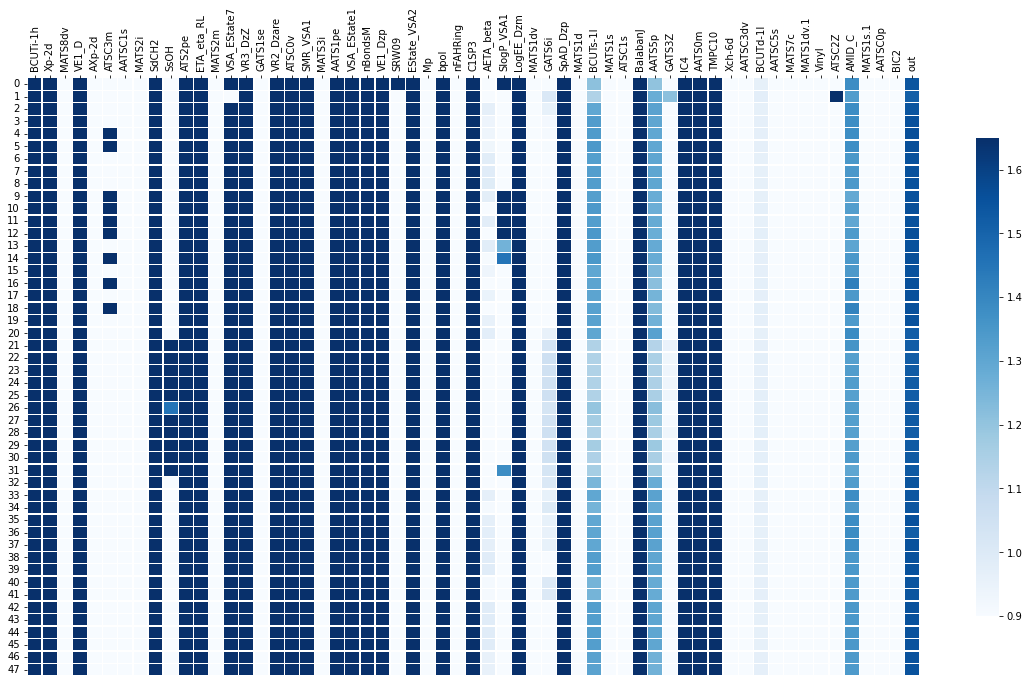

In [10]:
#ColorMap
fig, ax = plt.subplots()
fig.set_size_inches(20, 11)
ax.xaxis.tick_top()
sns.heatmap(df1, cmap="Blues", vmin= 0.9, vmax=1.65,
           linewidth=0.3, cbar_kws={"shrink": .8})

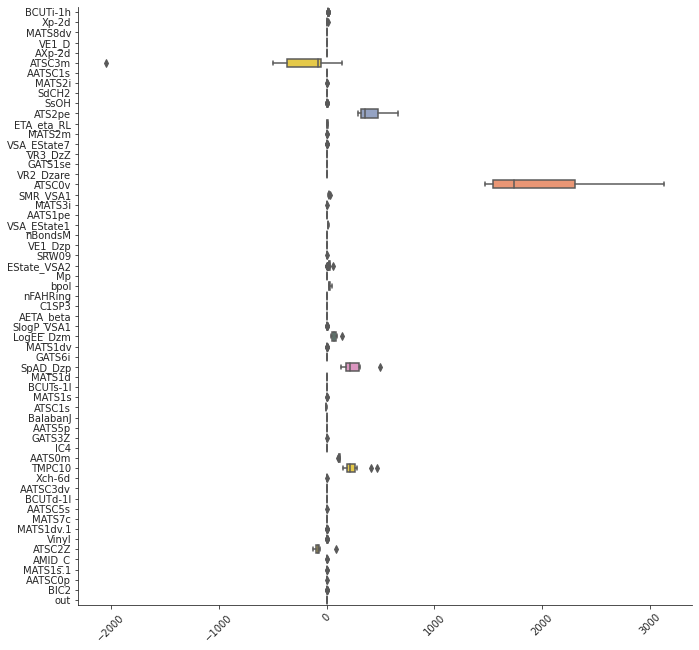

In [11]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 11)
sns.boxplot(data=df1, orient="h", palette="Set2")
plt.xticks(rotation=45)
sns.despine()


In [12]:
#Columnas que tienen una desviacion estandar mas alta que el promedio de las demas
df_std = df1.describe().loc['std',:][df1.describe().loc['std',:] > df1.describe().loc['std',:].mean()]
print(df_std)
df_std = df_std.to_frame()
columns_std = list(df_std.index)
columns_std.append('out')
df1[columns_std].head()

ATSC3m       331.874718
ATS2pe        87.764315
ATSC0v       397.833824
LogEE_Dzm     20.867197
SpAD_Dzp      69.570807
TMPC10        59.272357
ATSC2Z        33.063973
Name: std, dtype: float64


,ATSC3m,ATS2pe,ATSC0v,LogEE_Dzm,SpAD_Dzp,TMPC10,ATSC2Z,out
0,-256.139555,506.438430,2272.518275,89.157917,283.765048,465.647,-58.195687,1.544
1,-2045.543729,663.264328,3131.459122,146.864357,491.605118,416.511,91.515649,1.514
2,-215.077577,444.735096,2153.527014,86.298689,284.844531,279.456,-80.361692,1.542
3,-13.175728,351.860168,1732.525797,61.725428,204.628987,215.264,-79.593670,1.559
4,6.926141,342.353415,1689.535403,59.196361,196.394141,208.536,-79.700135,1.560


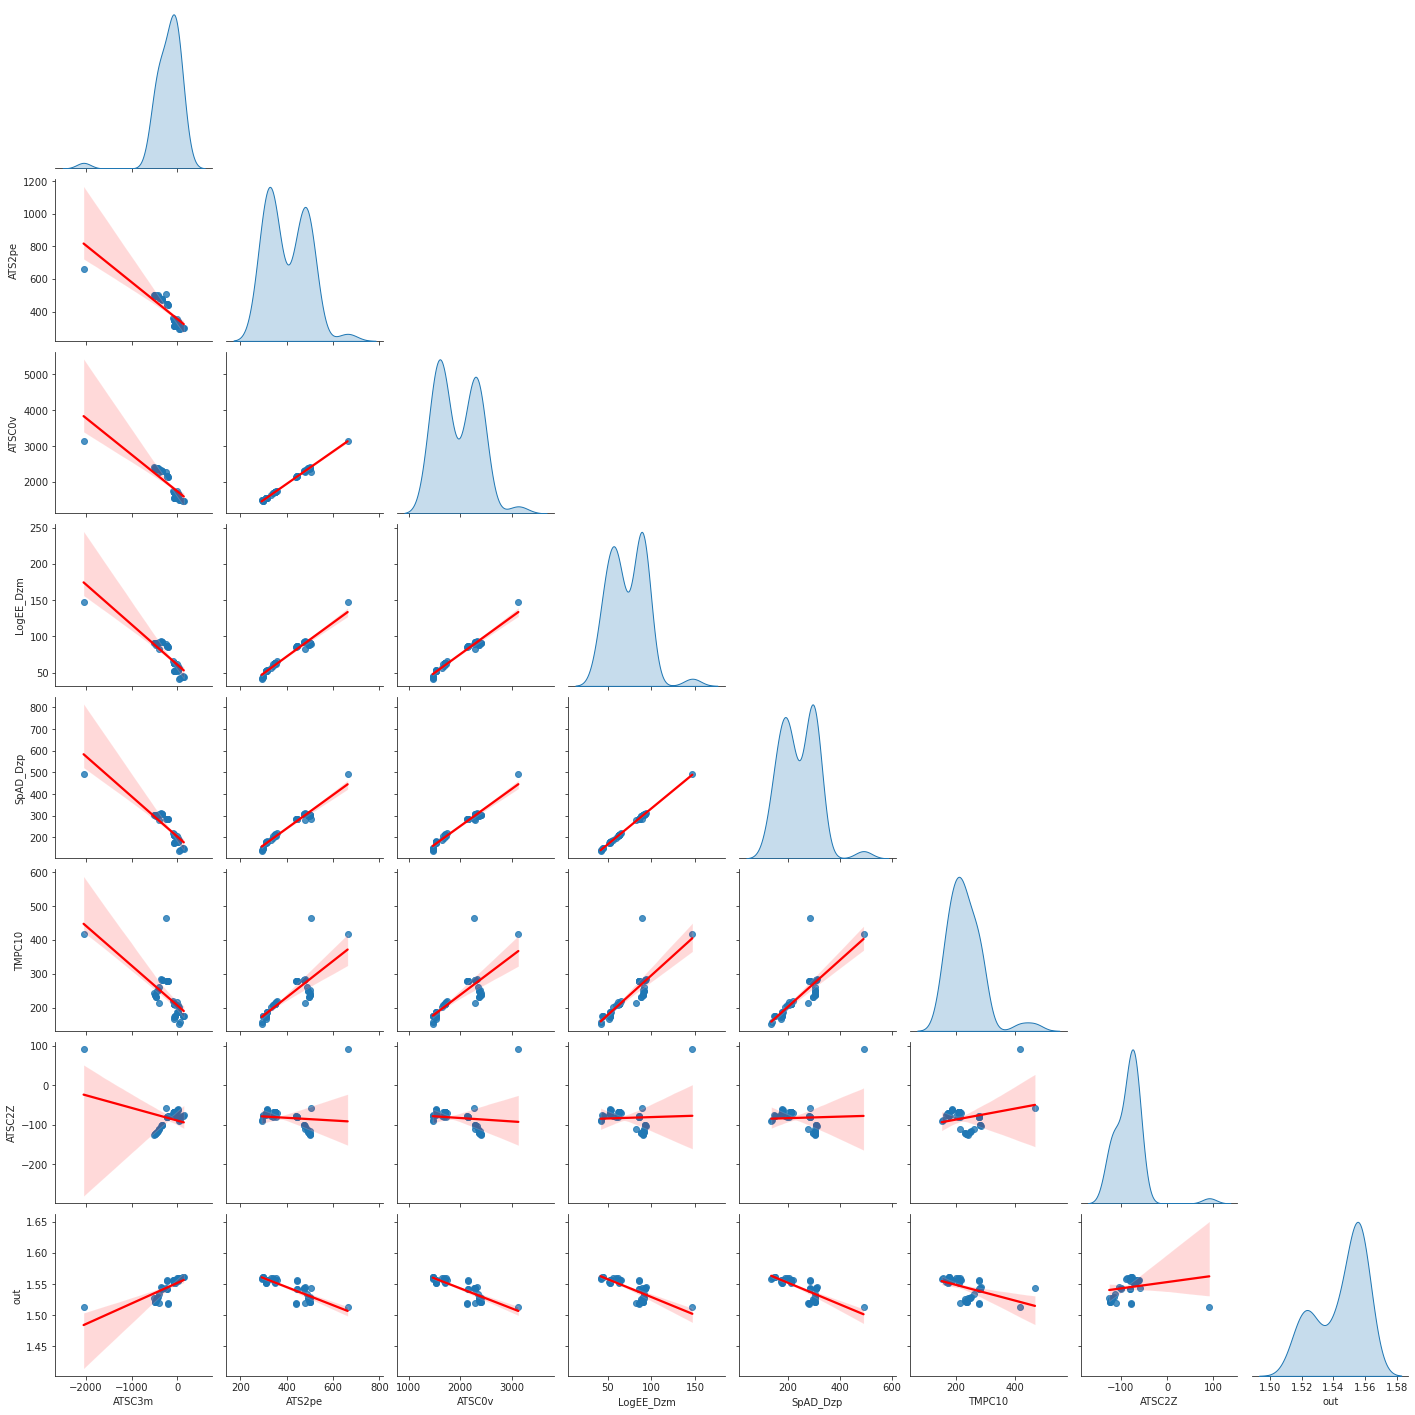

In [13]:
sns.pairplot(df1[columns_std], corner=True, diag_kind="kde", kind="reg", plot_kws={'line_kws':{'color':'red'}})
#solo dos columnas que tienen alto std tienen baja correlacion

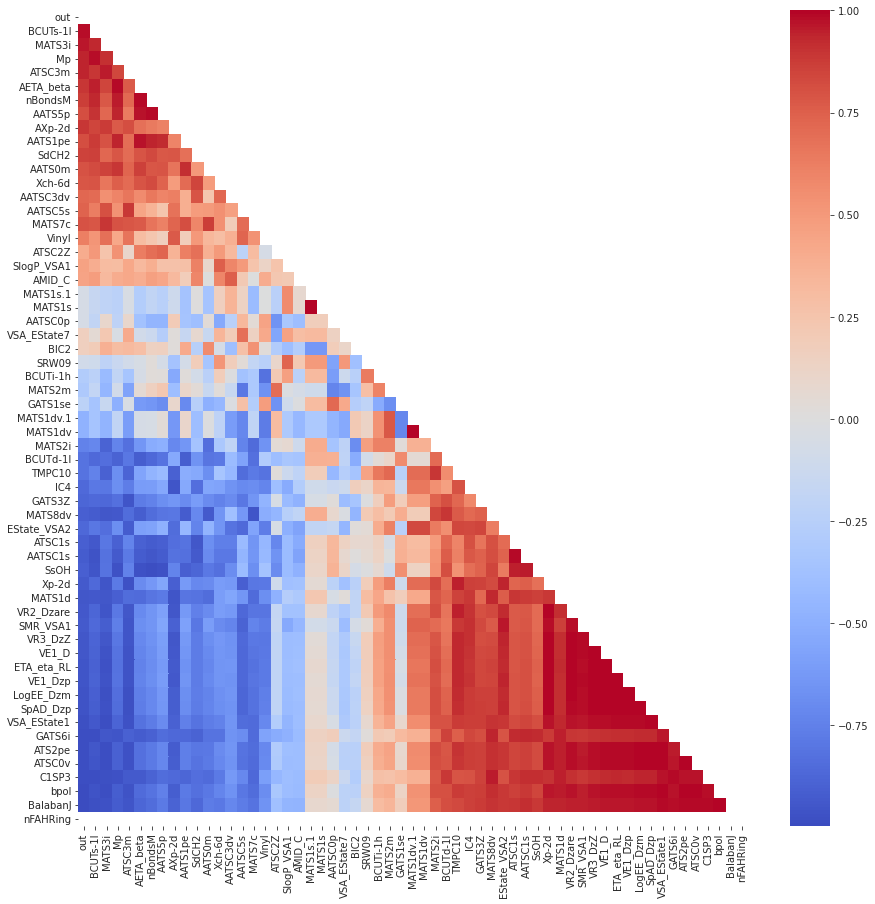

In [14]:
corr = df1.corr()
#sort_corr= corr['out'].abs().sort_values(ascending=False)
sort_corr= corr['out'].sort_values(ascending=False)
corr_matrix = corr[sort_corr.index].corr()
matrix = np.triu(corr_matrix)
fig, ax = plt.subplots()
fig.set_size_inches(15, 15)
sns.heatmap(corr_matrix, annot=False, mask=matrix,cmap='coolwarm')
#los valores en color suave tienen baja correlacion

In [15]:
#Valor minimo de correlacion
c = 0.5
#c = abs(corr['out']).mean()
#c = 0.25

BalabanJ       0.895082
bpol           0.865197
BCUTs-1l       0.863497
C1SP3          0.854826
ATSC0v         0.848976
ATS2pe         0.847107
GATS6i         0.830273
VSA_EState1    0.822117
SpAD_Dzp       0.801125
LogEE_Dzm      0.795229
MATS3i         0.794417
Mp             0.778135
VE1_Dzp        0.776716
ETA_eta_RL     0.775315
VE1_D          0.770636
VR3_DzZ        0.757802
SMR_VSA1       0.735974
VR2_Dzare      0.733210
MATS1d         0.729479
Xp-2d          0.728739
ATSC3m         0.728736
SsOH           0.724070
AETA_beta      0.702466
AATSC1s        0.698552
nBondsM        0.676880
ATSC1s         0.654170
EState_VSA2    0.642814
MATS8dv        0.631221
AATS5p         0.611362
AXp-2d         0.605869
AATS1pe        0.574717
GATS3Z         0.565102
SdCH2          0.539235
IC4            0.525599
AATS0m         0.522260
TMPC10         0.500996
Name: out, dtype: float64


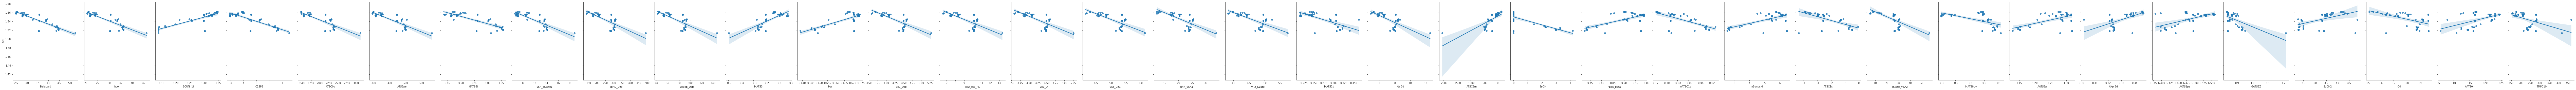

In [16]:
#columnas que tienen una correlacion mayor 
high_corr= abs(corr['out'])[abs(corr['out']) > c]
#high_corr= corr['out'][corr['out'] > corr.out.mean()]
high_corr = high_corr.drop(labels=['out'])
print(high_corr.sort_values(ascending=False))
columns_high_corr = list(high_corr.sort_values(ascending=False).to_frame().index)
#plot
sns.pairplot(df1, x_vars=columns_high_corr, y_vars=["out"], height=5, aspect=.8, kind="reg")
#for column in columns_high_corr:
#    sns.jointplot(data = df1, x =column, y ="out")

In [17]:
#columnas que tienen una correlacion menor 
low_corr= abs(corr['out'])[abs(corr['out']) < c]
#low_corr= corr['out'][corr['out'] < corr.out.mean()]
print(low_corr.sort_values())
df_low_corr = low_corr.sort_values().to_frame()
columns_low_corr = list(df_low_corr.index)

BIC2           0.002479
VSA_EState7    0.003475
SRW09          0.007759
AATSC0p        0.016005
BCUTi-1h       0.065374
MATS2m         0.124478
MATS1s         0.127039
MATS1s.1       0.127039
GATS1se        0.163473
AMID_C         0.178566
SlogP_VSA1     0.203590
ATSC2Z         0.222257
Vinyl          0.233570
MATS1dv        0.252241
MATS1dv.1      0.252241
MATS7c         0.391496
MATS2i         0.415266
AATSC5s        0.419826
BCUTd-1l       0.438509
AATSC3dv       0.448362
Xch-6d         0.479747
Name: out, dtype: float64


In [18]:
#se eliminan las columnas con poca correlacion (Opcional)
df_highcorr = df1.drop(df1[columns_low_corr],axis=1)
df_highcorr.shape

(48, 38)

In [ ]:
#Multivariate Regression

In [ ]:
#Dividimos nuestros datos en "x" y "y" excluyendo la columna out

In [19]:
#Elije el dataset completo o solo las columnas con alta correlacion

#X = df1.loc[:, df1.columns != 'out']
#y = df1.loc[:, df1.columns == 'out'].values.ravel()
X = df_highcorr.loc[:, df_highcorr.columns != 'out']
y = df_highcorr.loc[:, df_highcorr.columns == 'out'].values.ravel()

In [20]:
# Dividimos el dataset en datos de entrenamiento y datos que nos servirán para el testing (en este caso el 33% de los datos).

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [22]:
#Tune the Number of Selected Features
def RKFold(X,y):
    # define the evaluation method
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # define the pipeline to evaluate
    model = LinearRegression()
    fs = SelectKBest(score_func=mutual_info_regression)
    pipeline = Pipeline(steps=[('sel',fs), ('lr', model)])
    # define the grid
    grid = dict()
    grid['sel__k'] = [i for i in range(X.shape[1]-20, X.shape[1]+1)]
    # define the grid search
    search = GridSearchCV(pipeline, grid, scoring='neg_mean_squared_error', n_jobs=-1, cv=cv)
    # perform the search
    results = search.fit(X, y)
    # summarize best
    print('Best MAE: %.5f' % results.best_score_)
    print('Best Config: %s' % results.best_params_)
    # summarize all
    means = results.cv_results_['mean_test_score']
    params = results.cv_results_['params']
    for mean, param in zip(means, params):
        print(">%.5f with: %r" % (mean, param))
    return results.best_params_['sel__k']

best_params = RKFold(X,y)

Best MAE: -0.00032
Best Config: {'sel__k': 18}
>-0.00221 with: {'sel__k': 17}
>-0.00032 with: {'sel__k': 18}
>-0.00100 with: {'sel__k': 19}
>-0.00197 with: {'sel__k': 20}
>-0.00088 with: {'sel__k': 21}
>-0.00255 with: {'sel__k': 22}
>-0.00168 with: {'sel__k': 23}
>-0.00190 with: {'sel__k': 24}
>-0.00209 with: {'sel__k': 25}
>-0.00339 with: {'sel__k': 26}
>-0.00116 with: {'sel__k': 27}
>-0.00078 with: {'sel__k': 28}
>-0.00061 with: {'sel__k': 29}
>-0.00040 with: {'sel__k': 30}
>-784676505160767111168.00000 with: {'sel__k': 31}
>-803238280021359067136.00000 with: {'sel__k': 32}
>-945595481514620616704.00000 with: {'sel__k': 33}
>-774863606515858931712.00000 with: {'sel__k': 34}
>-616635405980967108608.00000 with: {'sel__k': 35}
>-310671842633165570048.00000 with: {'sel__k': 36}
>-154066478409215115264.00000 with: {'sel__k': 37}


In [23]:
# feature selection
def select_features(best_params, X, y):
    fs = SelectKBest(score_func=mutual_info_regression, k=best_params)
    # learn relationship from training data
    fs.fit(X,y)
    cols = fs.get_support(indices=True)
    X_fs = X.iloc[:,cols]
    X_train_fs, X_test_fs, y_train, y_test = train_test_split(X_fs, y, test_size=0.33, random_state=1)
    return X_train_fs, X_test_fs, fs, X_fs

# feature selection
X_train_fs, X_test_fs, fs, X_fs= select_features(best_params, X, y)



Model Selection: realizamos el entrenamiento utilizando varios modelos de regresión diferentes

In [24]:
classifiers = [
    svm.SVR(),
    linear_model.Ridge(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.LassoCV(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()
    ]

Definimos las llaves del diccionario y lo creamos junto con una lista vacia

In [25]:
dict_list = ['name', 'y_pred', 'mae', 'model']
class_dict = {}
class_list = []

Iteramos todos los modelos y almacenamos el atributo name y cada modelo calcula los modelos más óptimos para los pesos utilizando los valores de entrada y salida de los datos de entrenamiento.

Utilizamos mean absolute error (MAE) para encontrar cual de todos los modelos nos da el error mas pequeño.

In [26]:
for i, classifier in enumerate(classifiers):
    class_dict = {}
    class_dict[dict_list[0]] = (classifiers[i].__class__.__name__)
    clf = classifier
    pipeline = Pipeline(steps=[
    #('scaler', MinMaxScaler()),
    #('scaler', RobustScaler()),
    ('scaler', StandardScaler()),
    ('model', clf)
    ])

    pipeline.fit(X_train_fs, y_train)
    y_pred = pipeline.predict(X_test_fs)

    #pipeline.fit(X_train, y_train)
    #y_pred = pipeline.predict(X_test)

    class_dict[dict_list[1]] = y_pred
    mae = metrics.mean_absolute_error(y_test, y_pred)
    class_dict[dict_list[2]] = mae
    class_dict[dict_list[3]] = clf
    class_list.append(class_dict)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:138: FutureWarning: The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.093429230301893e-07, tolerance: 5.18300000000002e-07
  positive,


Analizamos los datos 'mae' del diccionario y encontramos el más pequeño, en este caso fue.

In [27]:
minl = []
for dicts in class_list:
    print(dicts['name'],':',dicts['mae'])
    minl.append(dicts['mae'])

min_mae = min(minl)

def return_best_mae(class_list, min_mae):
    for dicts in class_list:
        if dicts['mae'] == min_mae:
            return dicts

best_mae = return_best_mae(class_list, min_mae)
print(best_mae)
#with best model do a hiperparameter tuning


SVR : 0.012000000000000025
Ridge : 0.003957369296890376
SGDRegressor : 0.09290006296309365
BayesianRidge : 0.0045184692177287905
LassoLars : 0.013578124999999955
LassoCV : 0.004417995778622244
ARDRegression : 0.004655160733386732
PassiveAggressiveRegressor : 0.055734674284588656
TheilSenRegressor : 126810313.9422161
LinearRegression : 0.00452344411834614
{'name': 'Ridge', 'y_pred': array([1.54646148, 1.52272033, 1.55412414, 1.54684831, 1.54646148,
       1.5559956 , 1.52791526, 1.53278305, 1.55412414, 1.52774547,
       1.52334442, 1.55540598, 1.52084804, 1.54203049, 1.55540598,
       1.54181949]), 'mae': 0.003957369296890376, 'model': Ridge()}


In [ ]:
'''
WITH HIGH CORR DATA AND FEATURE SELECTION
{'name': 'BayesianRidge', 'y_pred': array([1.54516922, 1.52425139, 1.55374143, 1.54541806, 1.54516922,
       1.55588899, 1.52931748, 1.53386998, 1.55374143, 1.52922606,
       1.52516904, 1.555227  , 1.52149844, 1.54231889, 1.555227  ,
       1.54218316]), 'mae': 0.003681995423639478, 'model': BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)}
'''

In [ ]:
'''
WITH HIGH CORRELATION DATA AND NO FEATURE SELECTION
{'name': 'BayesianRidge', 'y_pred': array([1.54528197, 1.52248676, 1.55455364, 1.54557025, 1.54528197,
       1.5565687 , 1.52645666, 1.53282866, 1.55455364, 1.52780615,
       1.52341837, 1.55584439, 1.51969194, 1.54197984, 1.55584439,
       1.54182259]), 'mae': 0.0037847423337281777, 'model': BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)}
'''

In [ ]:
'''
WITH HIGH CORR DATA AND FEATURE SELECTION
{'name': 'LinearRegression', 'y_pred': array([1.54369903, 1.52056455, 1.55432933, 1.54360333, 1.54369903,
       1.55712336, 1.52616507, 1.53423661, 1.55432933, 1.52827235,
       1.52306229, 1.55585731, 1.51307132, 1.5447952 , 1.55585731,
       1.5448474 ]), 'mae': 0.0039378484031668826, 'model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)}
'''

In [ ]:
'''
WITH ALL DATA (no correlation or feature selection)
{'name': 'BayesianRidge', 'y_pred': array([1.5448769 , 1.52247832, 1.55469369, 1.54512147, 1.5448769 ,
       1.55666446, 1.52603901, 1.53295677, 1.55469369, 1.52793525,
       1.52354839, 1.55612351, 1.51926809, 1.54207539, 1.55612351,
       1.54194198]), 'mae': 0.0037418050873889858, 'model': BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)}
'''

Graficamos los resultados

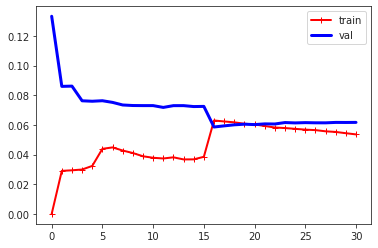

In [28]:
#learning curve
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=1)

    scaler = StandardScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns = X.columns)
    X_val_scaled = pd.DataFrame(scaler.transform(X_val),columns = X.columns)

    train_errors, val_errors = [], []
    for m in range(1, len(X_train_scaled)):
        model.fit(X_train_scaled[:m], y_train[:m])
        y_train_predict = model.predict(X_train_scaled[:m])
        y_val_predict = model.predict(X_val_scaled)
        train_errors.append(metrics.mean_absolute_error(y_train[:m], y_train_predict))
        val_errors.append(metrics.mean_absolute_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend()
#con feature selection
plot_learning_curves(model = linear_model.Ridge(), X = X_fs, y = y)

#sin feature selection
#plot_learning_curves(model = linear_model.Ridge(), X = X, y = y)


Text(0.5, 1.0, 'Feature importance using Ridge\nwith MAE: 0.003957369296890376')

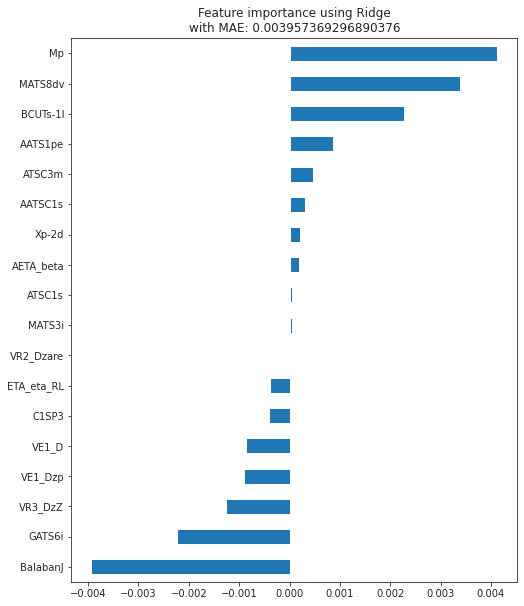

In [29]:
#Feature Importance

fs_index = fs.get_support(indices=True)
fs_columns = X.iloc[:,fs_index].columns
coef = pd.Series(best_mae['model'].coef_, index = fs_columns)
#coef = pd.Series(best_mae['model'].coef_, index = X.columns)

imp_coef = coef.sort_values()
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title(f"Feature importance using {best_mae['name']}\nwith MAE: {best_mae['mae']}")


In [30]:
high_corr.sort_values(ascending=False)

BalabanJ       0.895082
bpol           0.865197
BCUTs-1l       0.863497
C1SP3          0.854826
ATSC0v         0.848976
ATS2pe         0.847107
GATS6i         0.830273
VSA_EState1    0.822117
SpAD_Dzp       0.801125
LogEE_Dzm      0.795229
MATS3i         0.794417
Mp             0.778135
VE1_Dzp        0.776716
ETA_eta_RL     0.775315
VE1_D          0.770636
VR3_DzZ        0.757802
SMR_VSA1       0.735974
VR2_Dzare      0.733210
MATS1d         0.729479
Xp-2d          0.728739
ATSC3m         0.728736
SsOH           0.724070
AETA_beta      0.702466
AATSC1s        0.698552
nBondsM        0.676880
ATSC1s         0.654170
EState_VSA2    0.642814
MATS8dv        0.631221
AATS5p         0.611362
AXp-2d         0.605869
AATS1pe        0.574717
GATS3Z         0.565102
SdCH2          0.539235
IC4            0.525599
AATS0m         0.522260
TMPC10         0.500996
Name: out, dtype: float64

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

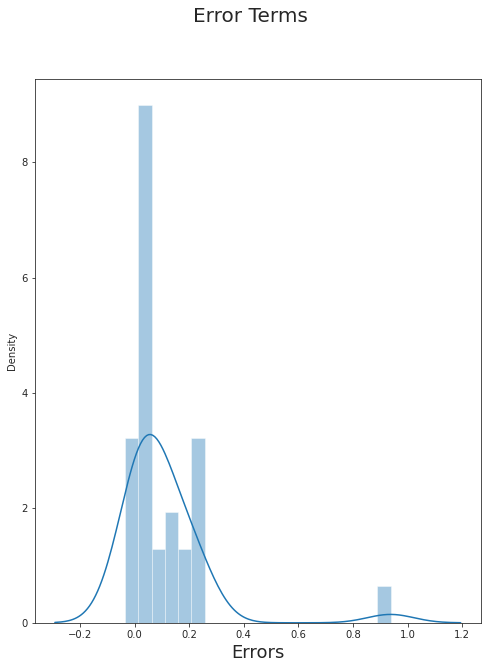

In [31]:
#Residual Analysis

y_train_price = best_mae['model'].predict(X_train_fs)
#y_train_price = best_mae['model'].predict(X_train)

#plot
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)        
plt.xlabel('Errors', fontsize = 18)    

No handles with labels found to put in legend.


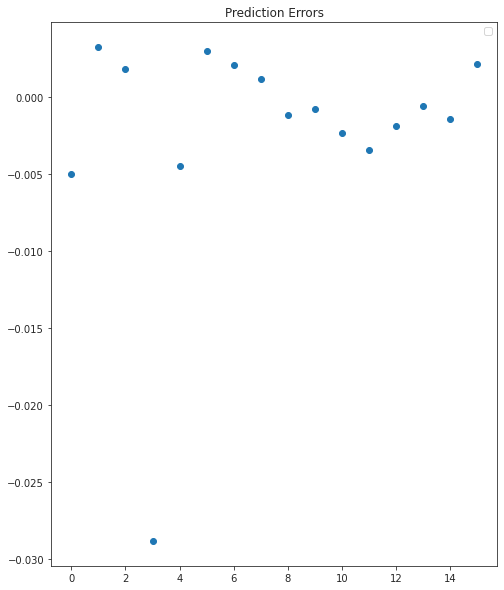

In [32]:
plt.plot(y_test - best_mae['y_pred'],marker='o',linestyle='')
plt.title("Prediction Errors")
plt.legend()
plt.show() 

In [ ]:
#Hyperparameter CV best model

In [33]:
#y_train, y_test

# feature selection
#X_fs,y
#X_train_fs, X_test_fs, fs
final_X_train = X_train_fs.copy()
final_X_test = X_test_fs.copy()

#No feature selection
#X, y
#X_train, X_test
#final_X_train = X_train.copy()
#final_X_test = X_test.copy()

from sklearn.linear_model import RidgeCV
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = RidgeCV(alphas=np.arange(0, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

scaler = StandardScaler().fit(final_X_train)
X_train_scaled = pd.DataFrame(scaler.transform(final_X_train),columns = final_X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(final_X_test),columns = final_X_test.columns)
BalabanJ       0.895082
bpol           0.865197
BCUTs-1l       0.863497
C1SP3          0.854826
ATSC0v         0.848976
ATS2pe         0.847107
GATS6i         0.830273
VSA_EState1    0.822117
SpAD_Dzp       0.801125
LogEE_Dzm      0.795229
MATS3i         0.794417
Mp             0.778135
VE1_Dzp        0.776716
ETA_eta_RL     0.775315
VE1_D          0.770636
VR3_DzZ        0.757802
SMR_VSA1       0.735974
VR2_Dzare      0.733210
MATS1d         0.729479
Xp-2d          0.728739
ATSC3m         0.728736
SsOH           0.724070
AETA_beta      0.702466
AATSC1s        0.698552
nBondsM        0.676880
ATSC1s         0.654170
EState_VSA2    0.642814
MATS8dv        0.631221
AATS5p         0.611362
AXp-2d         0.605869
AATS1pe        0.574717
GATS3Z         0.565102
SdCH2          0.539235
IC4            0.525599
AATS0m         0.522260
# fit model
model.fit(X_train_scaled, y_train)
y_pred_ridge = model.predict(X_test_scaled)
# MEA results
mae_ridge = metrics.mean_absolute_error(y_test, y_pred_ridge)
print(mae_ridge)

0.003954811590303725


In [34]:
!pip install shap

     |████████████████████████████████| 564 kB 2.7 MB/s 


In [35]:
import shap

explainer = shap.KernelExplainer(model.predict, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

X does not have valid feature names, but RidgeCV was fitted with feature names


  0%|          | 0/16 [00:00<?, ?it/s]

X does not have valid feature names, but RidgeCV was fitted with feature names
X does not have valid feature names, but RidgeCV was fitted with feature names
The default of 'normalize' will be set to False in version 1.2 and deprecated in version 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLarsIC())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
X does not have valid feature names, but RidgeCV was fitted with feature names
X does not have valid feature names, but RidgeCV was fitted with feature names
The default of 'normalize' will be set to False in versio

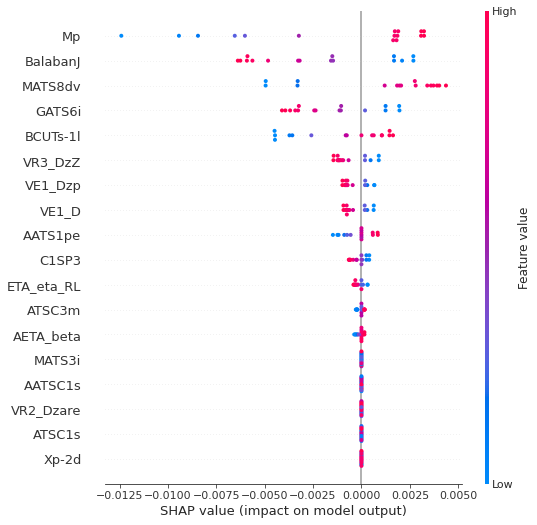

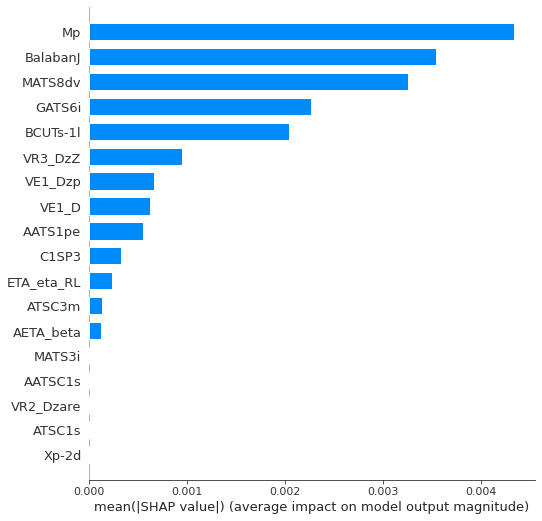

In [36]:
shap.summary_plot(shap_values, X_test_scaled)
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")

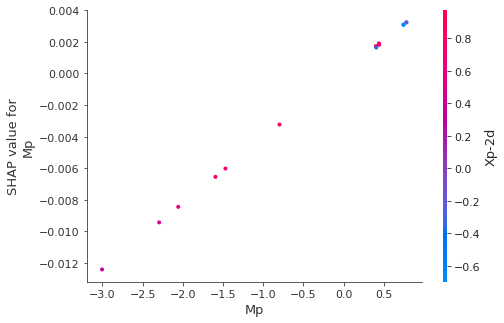

In [37]:
shap.initjs()
shap.dependence_plot("Mp", shap_values, X_test_scaled)

In [38]:
shap.initjs()
shap.force_plot(explainer.expected_value,shap_values[10,:], X_test_scaled.iloc[10,:])

In [39]:
y_test[10]

1.521

In [40]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test_scaled)